# Simple Linear Regression

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Load Data

In [113]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
468,2014,GMC,TERRAIN AWD,SUV - SMALL,3.6,6,A6,E,19.8,13.6,17.0,17,272
1038,2014,VOLKSWAGEN,JETTA GLI,COMPACT,2.0,4,A6,Z,10.2,7.5,9.0,31,207
373,2014,FORD,F150 4X4,PICKUP TRUCK - STANDARD,3.5,6,AS6,X,15.4,11.0,13.4,21,308
856,2014,NISSAN,ROGUE AWD,SUV - SMALL,2.5,4,AV,X,9.5,7.4,8.6,33,198
177,2014,CADILLAC,CTS-V SPORT WAGON,STATION WAGON - SMALL,6.2,8,AS6,Z,19.7,12.9,16.6,17,382



## Understand the data

### `FuelConsumption.csv`:
You will use a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64).

- **MODEL YEAR** e.g. 2014
- **MAKE** e.g. VOLVO
- **MODEL** e.g. S60 AWD
- **VEHICLE CLASS** e.g. COMPACT
- **ENGINE SIZE** e.g. 3.0
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. AS6
- **FUEL TYPE** e.g. Z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 13.2
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 9.5
- **FUEL CONSUMPTION COMBINED (L/100 km)** e.g. 11.5
- **FUEL CONSUMPTION COMBINED MPG (MPG)** e.g. 25
- **CO2 EMISSIONS (g/km)** e.g. 182 

Your task will be to create a simple linear regression model from one of these features to predict CO2 emissions of unobserved cars based on that feature. 


In [114]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Step1. Select Features
CO2 배출을 나타낼 수 있는 몇 가지 특징을 선택

In [115]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

히스토그램을 통해 각 feature들을 살펴보기

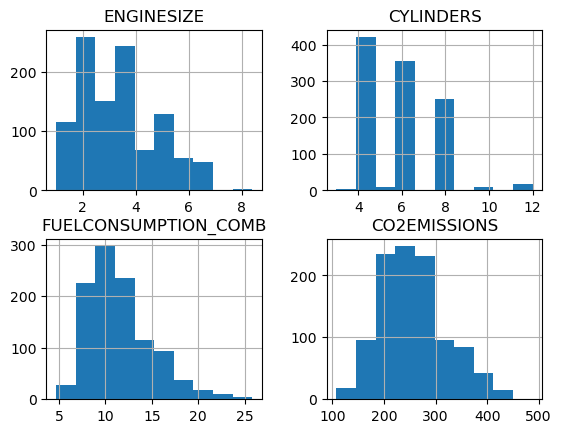

In [116]:
cdf.hist()
plt.show()

CO2 배출량과 비교한 산점도를 표시해 관계가 얼마나 선형적인지 확인

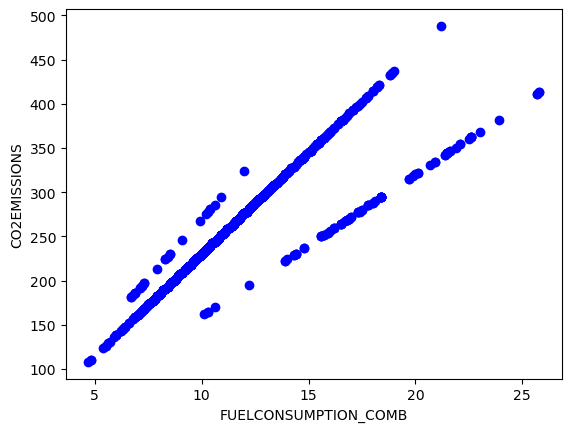

In [117]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

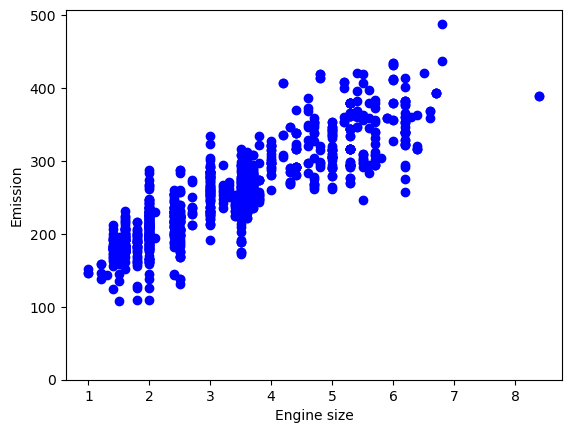

In [118]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.ylim(0,)
plt.show()

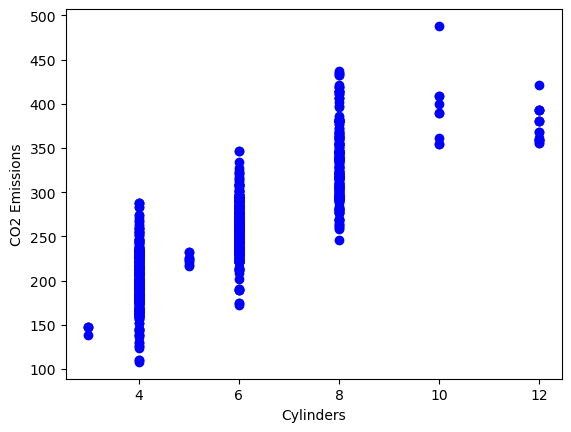

In [119]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions")
plt.show()

## Step2: 데이터셋에서 입력 특성(Input features)과 레이블을 추출

In [120]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

Train 및 Test Dataset 생성

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Step3: Simple Linear Regression model 설계

In [122]:
from sklearn import linear_model

# create model object
slm = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features)
# So we need to reshape it. We can let it infer the number of observations using '-1'.
slm.fit(X_train.reshape(-1,1), y_train)

# Print the coefficients
print(f'Coefficients: {slm.coef_[0]}') # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print(f'Intercept: {slm.intercept_}')

Coefficients: 38.99297872443396
Intercept: 126.28970217408761


#### Visualize model outputs

Text(0, 0.5, 'Emission')

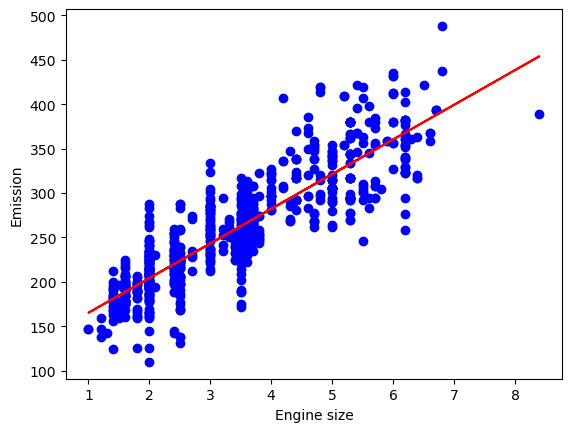

In [123]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, slm.coef_ * X_train + slm.intercept_, '-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')

## Step4: Model Evaluation

In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = slm.predict(X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test_, y_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_test))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test_, y_test))
print("R2-score: %.2f" % r2_score(y_test_, y_test))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.68


**1. Plot regression model over the test data**

Text(0, 0.5, 'Emission')

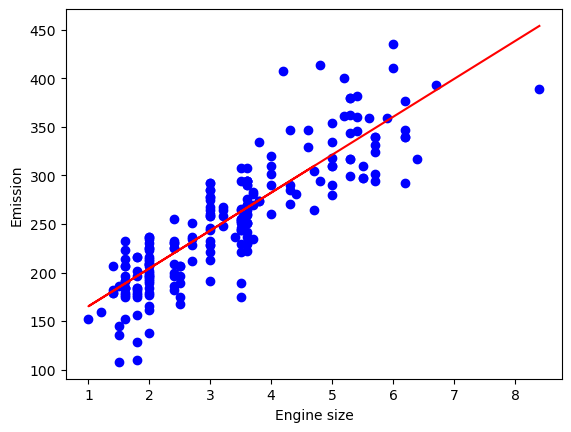

In [125]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, slm.coef_ * X_test + slm.intercept_, '-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')

---

# Multiple Linear Regression

In [126]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [127]:
# Drop categoricals and any unseless columns
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)

In [130]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


**위 상관관계 분석 검토**
- 여기서는 각 변수와 목표 변수인 'CO2EMISSIONS' 간의 상관관계가 표시
- 이들 각각은 85%를 넘는 상당히 높은 상관관계를 보여주므로, 모두 좋은 후보 특성들임
- 서로 다른 변수 쌍 간의 상관관계를 보면, 'ENGINESIZE'와 'CYLINDERS'는 높은 상관관계를 보이지만, 'ENGINESIZE'가 목표 변수와 더 높은 상관관계를 가지므로 'CYLINDERS'는 제외
- 'FUELCONSUMPTION_COMB_MPG'가 목표 변수와 가장 높은 상관관계를 가지므로, 나머지인 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'는 제외

In [131]:
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis=1)

In [132]:
df.head(9)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
5,3.5,28,230
6,3.5,28,232
7,3.7,25,255
8,3.7,24,267


중복되지 않는 예측 특성(predictive features)을 선택하는데 도움이 되도록, 아래 산점도 행렬을 참고.
이 행렬은 입력 특성 간 각 쌍의 산점도를 보여줌. 행렬의 대각선은 각 특성의 히스토그램이 표시됨.

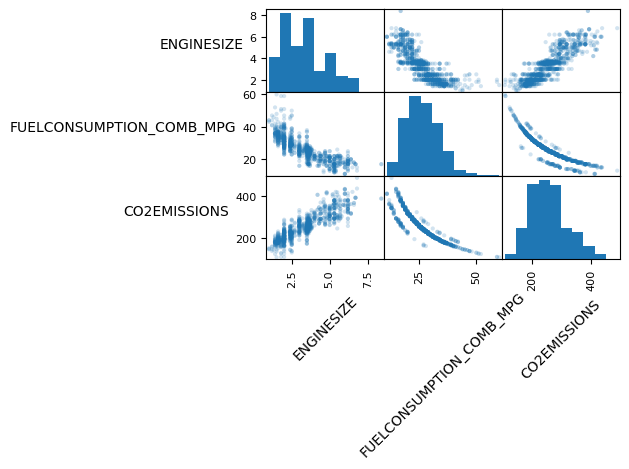

In [133]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2)
# need to rotate axis labels so we can read them
for ax in axes.flatten():  # flatten으로 2차원 배열을 1차원으로 평탄화
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

### Extract the input features and labels from the data set

In [134]:
X = df.iloc[:,[0,1]].to_numpy()
y = df.iloc[:,-1].to_numpy()

### Preprocess selected features

모델이 특성의 크기 때문에 어느 하나를 왜고하여 더 중요하게 여기지 않도록, 입력 특성들을 **표준화**합니다.<br>일반적인 방법은 평균을 빼고 표준편차로 나누는 것입니다. `Scikit-learn`을 사용하면 이 작업을 쉽게 할 수 있습니다.

In [136]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

In [137]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


위에서 알 수 있듯이 표준편차는 1이고 평균은 0 을 가진 표준화된 편수가 되었습니다.

### Create Train and Test datasets

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2,random_state=42)

### Build a multiple linear regression model

In [139]:
from sklearn import linear_model

# create a model object
mlm = linear_model.LinearRegression()

# train the model in the training data
mlm.fit(X_train, y_train)

# print the coefficients
coef_ = mlm.coef_
intercept_ = mlm.intercept_

print(f"Coefficients: {coef_}")
print(f"Intercept: {intercept_}")

Coefficients: [ 25.27339614 -37.4381472 ]
Intercept: 256.2907248808642


계수(Coefficients)와 절편(Intercept)은 데이터에 가장 잘 맞는 초평면(hyperplane)을 정의합니다. 변수는 두 개뿐이므로 초평면은 평면이 됩니다. 하지만 이 최적의 평면은 원래의 비표준화된 특성 공간에서는 다르게 보일 수 있습니다.

모델의 계수를 표준화 이전의 원래 공간으로 되돌리면, 입력 특성 관점에서 그것들이 무엇을 의미하는지를 제대로 이해할 수 있게 됩니다. 이러한 조정을 하지 않으면, 모델의 출력은 실제 독립 변수 및 해결하려는 현실 세계 문제와는 맞지 않는 추상적이고 변환된 공간에 묶이게 됩니다."

In [140]:
# Get the standard scaler's mean and standard deviation parameters
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

# The least squares paramenters can be calculated relative to the original, unstandardized feature space as:
coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print(f"Coefficients: {coef_original}")
print(f"Intercept: {intercept_original}")

Coefficients: [17.8581369  -5.01502179]
Intercept: 329.13639670253895


극단적인 경우로, ENGINESIZE와 FUELCONSUMPTION_COMB_MPG가 둘 다 0일 때, CO2 배출량 역시 0이 될 것이라 예상할 수 있습니다. 그러나 '최적의' 초평면은 y절편이 329 g/km으로 0이 아니기 때문에, 이는 일치하지 않습니다. 이는 목표 변수(CO2 배출량)가 독립 변수들과 아주 강한 선형 관계를 가지지 않거나, 데이터에 결과를 왜곡하는 이상치(outlier)가 포함되어 있기 때문일 수 있습니다. 이상치는 전처리 과정에서 다룰 수 있고, 이 과정에서 나중에 배우게 될 정규화(regularization) 기법을 통해서도 처리할 수 있습니다. 또한 변수 중 일부가 목표 변수와 비선형 관계를 가질 수도 있으며, 입력 변수 간에 여전히 다중공선성(colinearity)이 존재할 수도 있습니다.

#### Visualize model outputs
You can visualize the goodness-of-fit of the model to the training data by plotting the fitted plane over the data. 


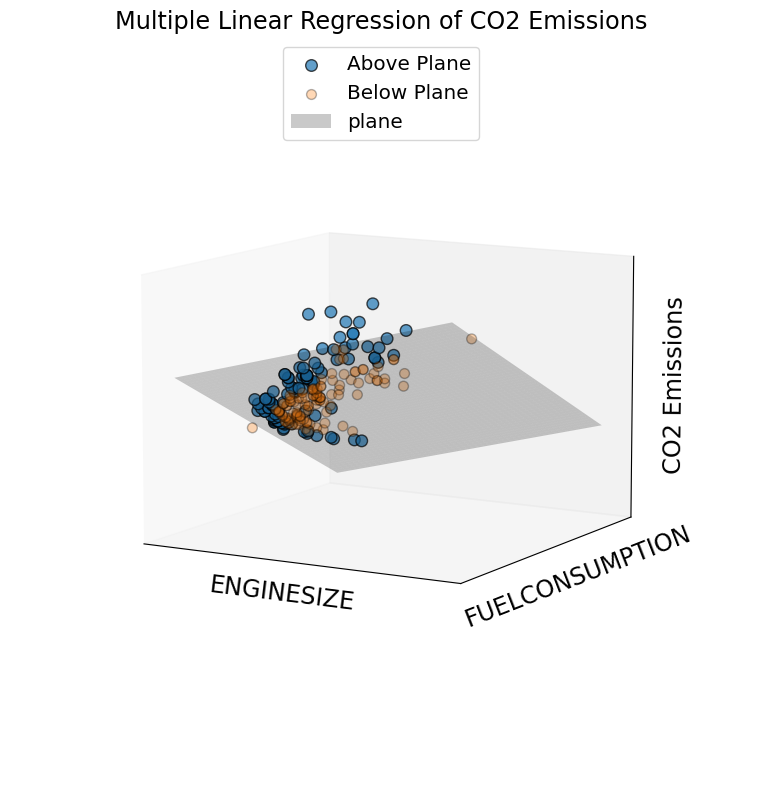

In [141]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Ensure X1, X2, and y_test have compatible shapes for 3D plotting
X1 = X_test[:, 0] if X_test.ndim > 1 else X_test
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)

# Create a mesh grid for plotting the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100), 
                               np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ +  coef_[0] * x1_surf  +  coef_[1] * x2_surf

# Predict y values using trained regression model to compare with actual y_test for above/below plane colors
y_pred = mlm.predict(X_test.reshape(-1, 1)) if X_test.ndim == 1 else mlm.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
#above_plane = above_plane[:,0]
#below_plane = below_plane[:,0]

# Plotting
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points above and below the plane in different colors
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane],  label="Above Plane",s=70,alpha=.7,ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane],  label="Below Plane",s=50,alpha=.3,ec='k')

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21,label='plane')

# Set view and labels
ax.view_init(elev=10)

ax.legend(fontsize='x-large',loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.show()


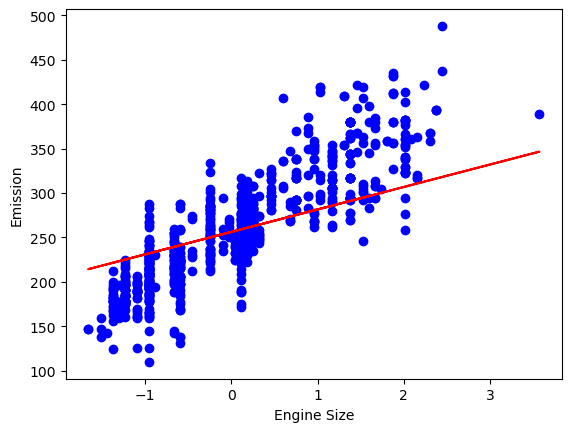

In [142]:
plt.scatter(X_train[:,0], y_train, color='blue')
plt.plot(X_train[:,0], coef_[0] * X_train[:,0] + intercept_, '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

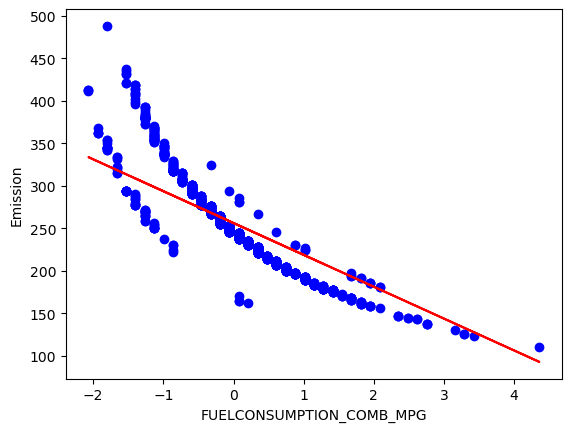

In [143]:
plt.scatter(X_train[:,1], y_train, color='blue')
plt.plot(X_train[:,1], coef_[1] * X_train[:,1] + intercept_, '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()

분명히, 이 해는 매우 부실한데, 그 이유는 모델이 평면이 아닌 곡면에 평면을 맞추려고 하기 때문입니다.

#### 연습문제 1
엔진 크기에 대한 CO2 배출량의 최적 선형 회귀선을 위한 파라미터(계수와 절편)를 구하고 출력하세요.

In [144]:
X_train_1 = X_train[:,0]

regressor_1 = linear_model.LinearRegression()
regressor_1.fit(X_train_1.reshape(-1,1), y_train)
coef_1 = regressor_1.coef_
intercept_1 = regressor_1.intercept_

print ('Coefficients: ',coef_1)
print ('Intercept: ',intercept_1)

Coefficients:  [55.18408797]
Intercept:  256.7718301362164


`regressor_1.fit(X_train_1.reshape(-1,1), y_train)`
이 부분에서 모델은 오직 훈련 데이터(X_train, y_train) 를 사용하여
최적의 선형 회귀 계수(coef_1, intercept_1)를 학습합니다.

#### 연습문제 2
CO2 배출량과 ENGINESIZE 간의 산점도를 생성하고, 학습 데이터에 대한 최적 선형 회귀선을 함께 표시하세요.

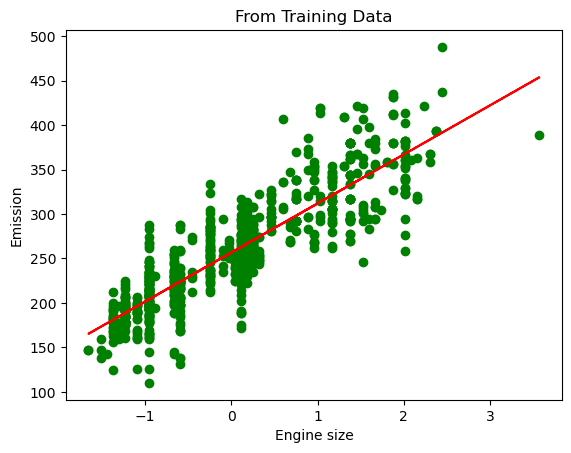

In [148]:
plt.scatter(X_train_1, y_train, color='green')
plt.plot(X_train_1, coef_1[0] * X_train_1 + intercept_1, 'r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("From Training Data")
plt.show()

`plt.plot(X_train_1, coef_1[0] * X_train_1 + intercept_1, 'r')`
이 부분에서 학습된 선을 훈련 데이터 위에 시각화하여 얼마나 잘 맞는지 확인.


"분명히, 이 단순 선형 회귀 모델은 다중 회귀 모델보다 학습 데이터에 대해 CO2 배출량을 훨씬 더 잘 맞춥니다. 이제 이 모델이 테스트 데이터에서 어떤 성능을 보이는지 확인해 봅시다."



#### 연습문제 3
이번에는 테스트 데이터셋을 기반으로 동일한 산점도와 최적 선형 회귀선을 생성하세요.
그 결과가 학습 데이터 결과와 어떻게 비교되는지 생각해 보세요.

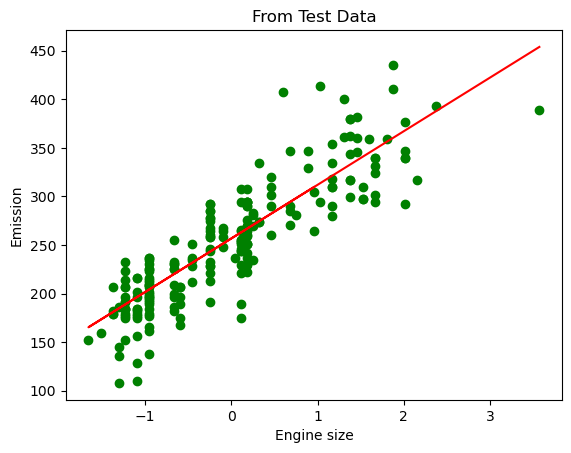

In [147]:
X_test_1 = X_test[:,0]
plt.scatter(X_test_1, y_test, color='green')
plt.plot(X_test_1, coef_1[0] * X_test_1 + intercept_1, '-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.title('From Test Data')
plt.show()

여기서 포인트는: 훈련된 선을 변경하지 않고, 테스트 데이터에 그대로 적용하는 것.
`plt.plot(X_test_1, coef_1[0] * X_test_1 + intercept_1, '-r')`
이 과정을 통해 모델이 보지 못한 데이터(test set) 에도 예측이 잘 되는지 시각적으로 검증

#### 연습문제 4
이번에는 동일한 모델링을 수행하되, 독립 변수로 FUELCONSUMPTION_COMB_MPG를 사용하세요.
모델의 계수와 절편을 포함해 출력하세요.

In [150]:
X_train_2 = X_train[:,1]

regressor_2 = linear_model.LinearRegression()
regressor_2.fit(X_train_2.reshape(-1,1), y_train)

coef_2 = regressor_2.coef_
intercept_2 = regressor_2.intercept_

print(f"Coefficients: {coef_2}")
print(f"Intercept: {intercept_2}")

Coefficients: [-58.51827989]
Intercept: 256.0939217919955


#### 연습문제 5
이전과 마찬가지로, 테스트 데이터에 대한 결과를 보여주는 산점도를 생성하세요.
모델이 얼마나 잘 맞는지를 잘 살펴보고, 어떻게 개선할 수 있을지 생각해 보세요.
이 내용은 이후 강의에서 다시 다룰 예정입니다.

Text(0, 0.5, 'EMISSIONS')

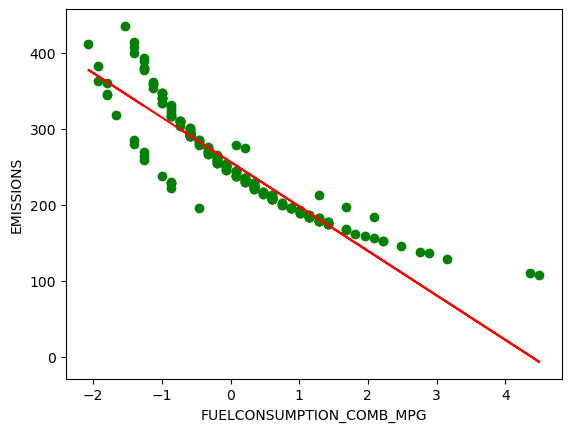

In [158]:
X_test_2 = X_test[:,1]

plt.scatter(X_test_2, y_test, color='g')
plt.plot(X_test_2, coef_2 * X_test_2 + intercept_2, '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("EMISSIONS")

### Congratulations! You're ready to move on to your next lesson!
## Author

<a href="https://www.linkedin.com/in/jpgrossman/" target="_blank">Jeff Grossman</a>

### Other Contributor(s)

<a href="https://www.linkedin.com/in/abhishek-gagneja-23051987/" taget="_blank">Abhishek Gagneja</a>

<h3 align="center"> © IBM Corporation. All rights reserved. <h3/>